In [ ]:
!pip install numpy pandas matplotlib

In [9]:
%matplotlib inline

In [10]:
import numpy as np
import pandas as pd

np.random.seed(42)

num_students = 200

# Generate data for each
student_id = np.arange(1, num_students + 1)
age = np.random.randint(15, 23, size=num_students)
study_hours = np.random.randint(0, 41, size=num_students)
previous_gpa = np.random.uniform(2.0, 4.0, size=num_students)
extracurricular_activities = np.random.randint(0, 6, size=num_students)
final_grade = np.random.randint(0, 101, size=num_students)
gender = np.random.choice(['Male', 'Female'], size=num_students)
family_income = np.random.randint(20000, 200001, size=num_students)

# Create the DataFrame
df = pd.DataFrame({
    'student_id': student_id,
    'age': age,
    'study_hours': study_hours,
    'previous_gpa': previous_gpa,
    'extracurricular_activities': extracurricular_activities,
    'final_grade': final_grade,
    'gender': gender,
    'family_income': family_income
})

df.head()

,student_id,age,study_hours,previous_gpa,extracurricular_activities,final_grade,gender,family_income
0,1,21,31,2.508327,2,3,Male,190354
1,2,18,38,2.590581,4,55,Female,139719
2,3,19,31,2.645102,3,24,Female,88244
3,4,21,3,3.697340,5,66,Female,162766
4,5,17,29,2.273243,0,95,Female,76264


In [11]:
# Check for any missing values
missing_values = df.isnull().sum()

# Display basic statistical summary
stat_summary = df.describe()

# Identify data types of all columns
data_types = df.dtypes

# Print the results
print("Missing Values:\n", missing_values)
print("\nStatistical Summary:\n", stat_summary)
print("\nData Types:\n", data_types)

Missing Values:
 student_id                    0
age                           0
study_hours                   0
previous_gpa                  0
extracurricular_activities    0
final_grade                   0
gender                        0
family_income                 0
dtype: int64

Statistical Summary:
        student_id         age  study_hours  previous_gpa  \
count  200.000000  200.000000   200.000000    200.000000   
mean   100.500000   18.560000    21.610000      2.995465   
std     57.879185    2.283082    12.168329      0.576849   
min      1.000000   15.000000     0.000000      2.010370   
25%     50.750000   17.000000    11.000000      2.501416   
50%    100.500000   18.000000    23.000000      2.992599   
75%    150.250000   21.000000    32.000000      3.465989   
max    200.000000   22.000000    40.000000      3.991862   

       extracurricular_activities  final_grade  family_income  
count                  200.000000   200.000000     200.000000  
mean                  

Mean of final_grade: 47.77
Median of final_grade: 47.5
Standard Deviation of final_grade: 30.866662506195198


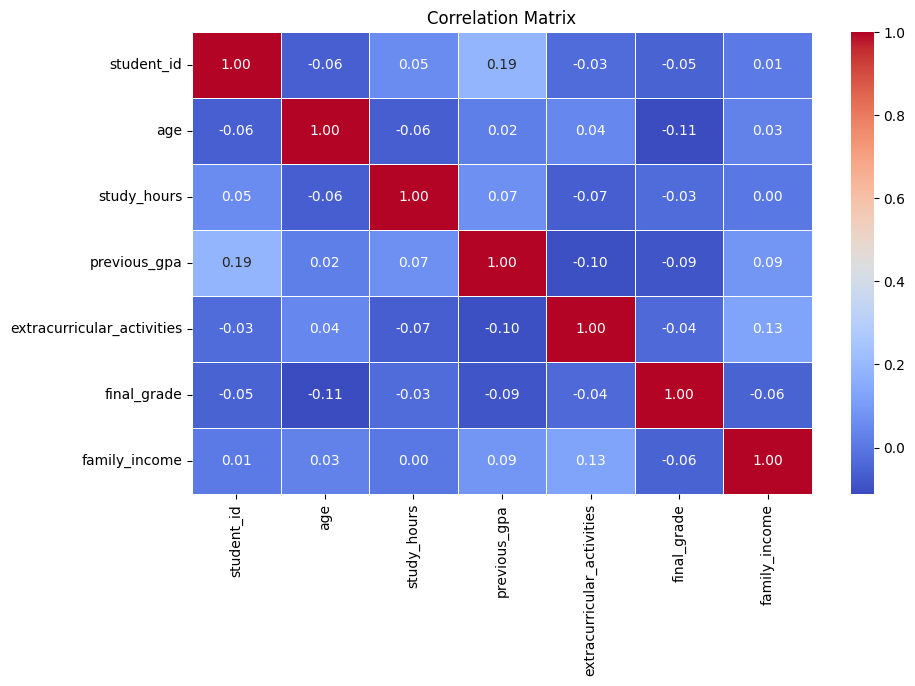

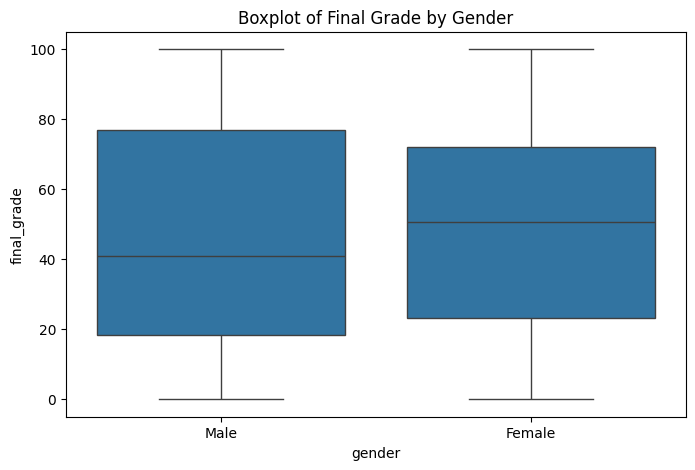

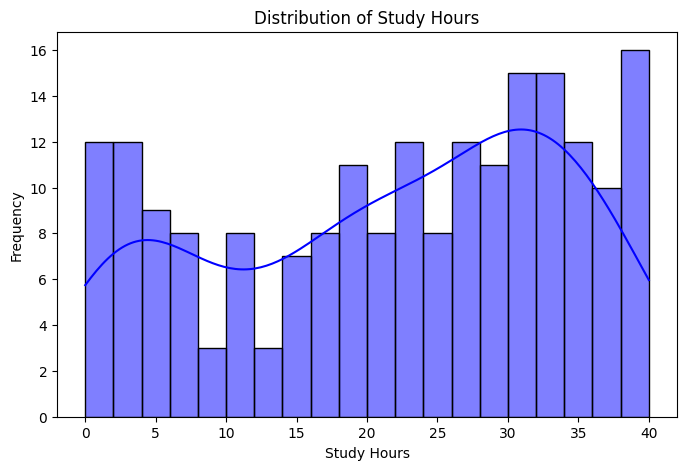

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Mean, median, and standard deviation of 'final_grade'
mean_grade = df['final_grade'].mean()
median_grade = df['final_grade'].median()
std_grade = df['final_grade'].std()

print(f"Mean of final_grade: {mean_grade}")
print(f"Median of final_grade: {median_grade}")
print(f"Standard Deviation of final_grade: {std_grade}")

# 2. Correlation matrix between numerical features
# Select only numeric columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# 3. Box plot of 'final_grade' by 'gender'
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='final_grade', data=df)
plt.title("Boxplot of Final Grade by Gender")
plt.show()

# 4. Histogram of 'study_hours'
plt.figure(figsize=(8, 5))
sns.histplot(df['study_hours'], bins=20, kde=True, color='blue')
plt.title("Distribution of Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Frequency")
plt.show()

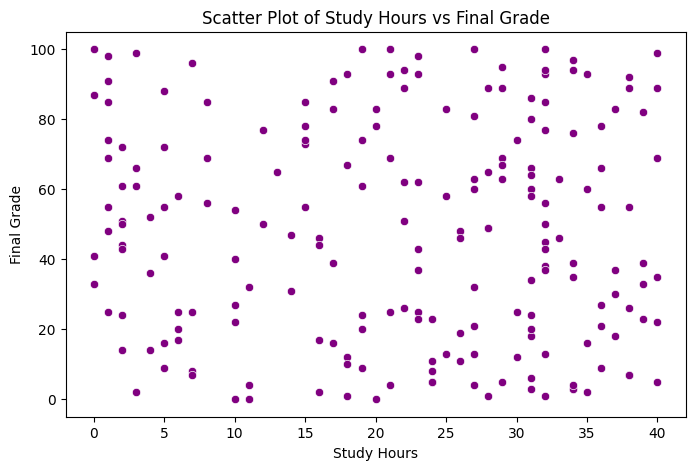

<ipython-input-13-0e7609447613>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='extracurricular_activities', y='final_grade', data=df, palette='muted')


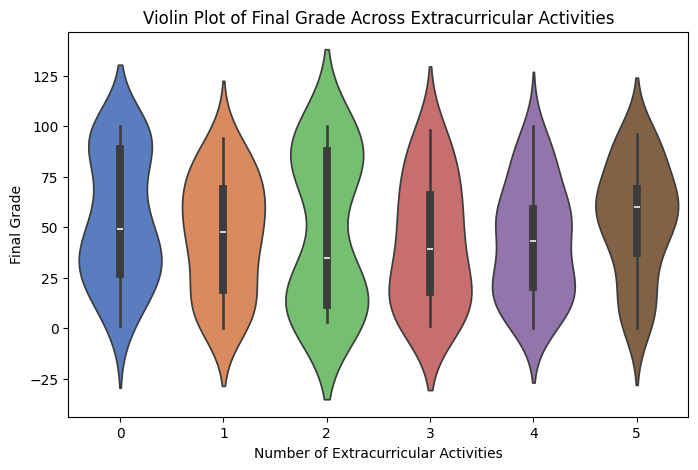

<ipython-input-13-0e7609447613>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_grade_by_income = df.groupby('income_quartile')['final_grade'].mean().reset_index()
<ipython-input-13-0e7609447613>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income_quartile', y='final_grade', data=avg_grade_by_income, palette='coolwarm')


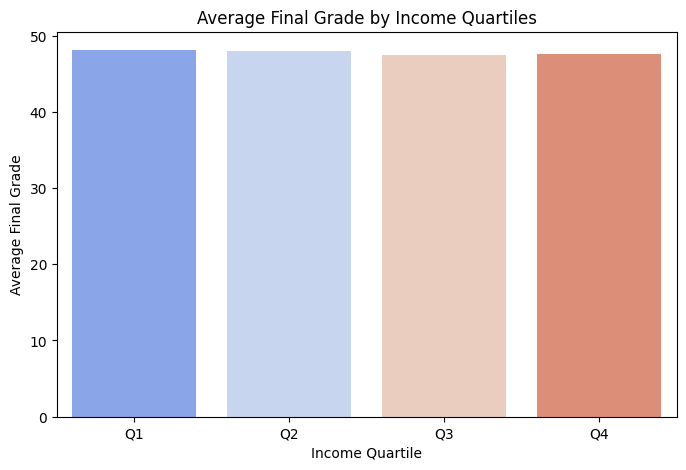

In [13]:
# Scatter plot of 'study_hours' vs 'final_grade'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='study_hours', y='final_grade', data=df, color='purple')
plt.title("Scatter Plot of Study Hours vs Final Grade")
plt.xlabel("Study Hours")
plt.ylabel("Final Grade")
plt.show()

# Violin plot of 'final_grade' across different levels of 'extracurricular_activities'
plt.figure(figsize=(8, 5))
sns.violinplot(x='extracurricular_activities', y='final_grade', data=df, palette='muted')
plt.title("Violin Plot of Final Grade Across Extracurricular Activities")
plt.xlabel("Number of Extracurricular Activities")
plt.ylabel("Final Grade")
plt.show()

# Bar plot showing average 'final_grade' by income quartiles
# First, create income quartiles
df['income_quartile'] = pd.qcut(df['family_income'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Now, calculate the average final_grade by income quartiles
avg_grade_by_income = df.groupby('income_quartile')['final_grade'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='income_quartile', y='final_grade', data=avg_grade_by_income, palette='coolwarm')
plt.title("Average Final Grade by Income Quartiles")
plt.xlabel("Income Quartile")
plt.ylabel("Average Final Grade")
plt.show()


Answer the following questions through data analysis:
 - What is the correlation between study hours and final grade?  

 Analyzing the scatter plot between study hours and final grade, it seems like there is a weak negative correlation between the two features. This implies that the students who spend more time studying have a very weak tendency of scoring low final grades. But the factor is very low so this relationship is very weak and quite insignificant.

 - How does family income impact academic performance?

 Evaluating the box plot between the income quartiles and final grade, since the height of all of the bars across different quartiles is the same, it appears that there may not be a significant relationship between family income and academic performance.

 - Are there significant grade differences between genders?

 The boxplot shows that the median final grades and grade distributions for males and females are similar, with comparable variability and overlap between the two groups. This suggests no substantial differences in academic performance based on gender. Statistical testing would be needed to confirm whether any observed differences are significant.

 - How do extracurricular activities relate to academic performance?
  
  The violin plot shows no strong relationship between the number of extracurricular activities and academic performance, as median grades and grade distributions remain consistent across activity levels. This suggests that extracurricular involvement does not significantly impact final grades.